In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')


In [18]:
df = pd.read_csv('Mall_Customers.csv')

print(f"Dataset loaded: {df.shape[0]} customers, {df.shape[1]} features")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
df.head()

Dataset loaded: 200 customers, 5 features
Columns: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

First 5 rows:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
print("Dataset Info:")
df.info()
print("\nMissing values:", df.isnull().sum().sum())
print("\nStatistical Summary:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Missing values: 0

Statistical Summary:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [20]:
# Select features for clustering
features = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()
print("Selected features for clustering:")
print(features.describe())

Selected features for clustering:
       Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000
75%             78.000000               73.000000
max            137.000000               99.000000


In [21]:
# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

features_scaled_df.describe()


,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


k=2: Silhouette Score = 0.321
k=3: Silhouette Score = 0.467
k=4: Silhouette Score = 0.494
k=5: Silhouette Score = 0.555
k=6: Silhouette Score = 0.540
k=7: Silhouette Score = 0.528
k=8: Silhouette Score = 0.455
k=9: Silhouette Score = 0.457
k=10: Silhouette Score = 0.443


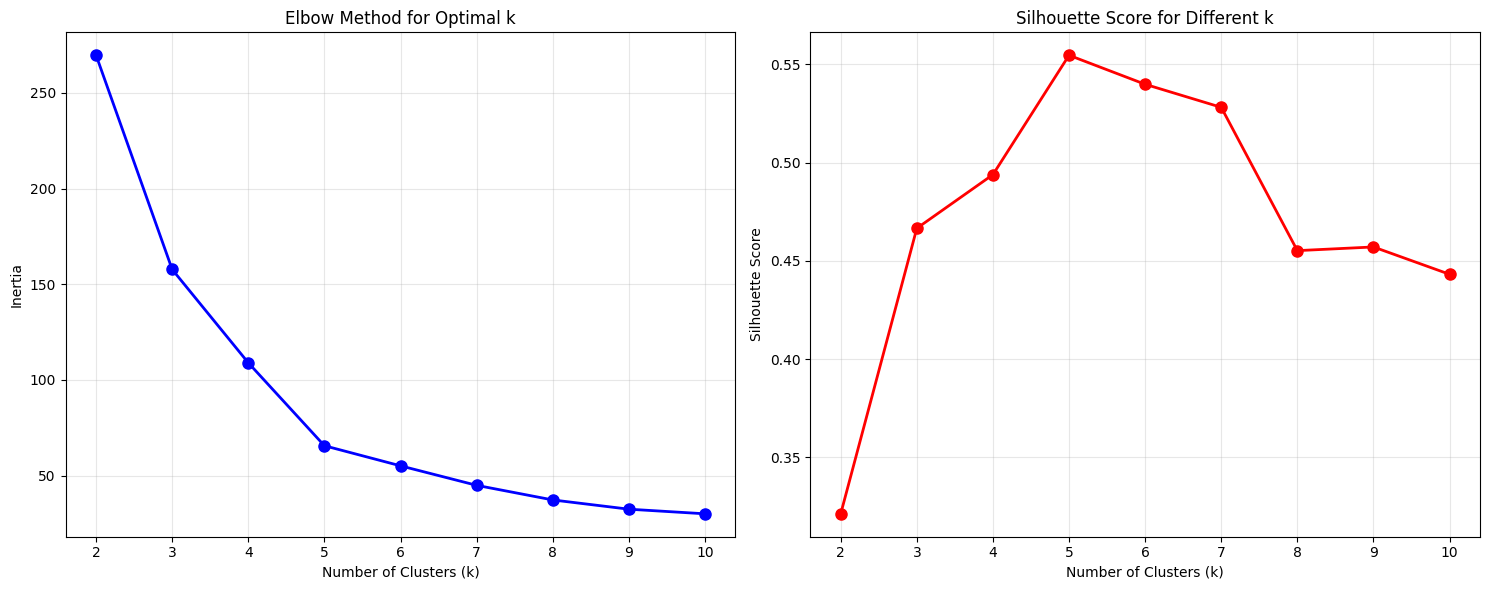


Optimal number of clusters: 5
Best Silhouette Score: 0.555


In [22]:
# Elbow Method and Silhouette Analysis
inertias = []
silhouette_scores = []
k_range = range(2, 11)

#Testing diff vals of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))
    print(f"k={k}: Silhouette Score = {silhouette_scores[-1]:.3f}")

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True, alpha=0.3)

ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score for Different k')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters: {optimal_k}")
print(f"Best Silhouette Score: {max(silhouette_scores):.3f}")

In [23]:
# Apply K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(features_scaled)
df['Cluster'] = cluster_labels

final_silhouette = silhouette_score(features_scaled, cluster_labels)
print("\nCluster distribution:")
cluster_counts = df['Cluster'].value_counts().sort_index()
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} customers ({count/len(df)*100:.1f}%)")


Cluster distribution:
Cluster 0: 81 customers (40.5%)
Cluster 1: 39 customers (19.5%)
Cluster 2: 22 customers (11.0%)
Cluster 3: 35 customers (17.5%)
Cluster 4: 23 customers (11.5%)


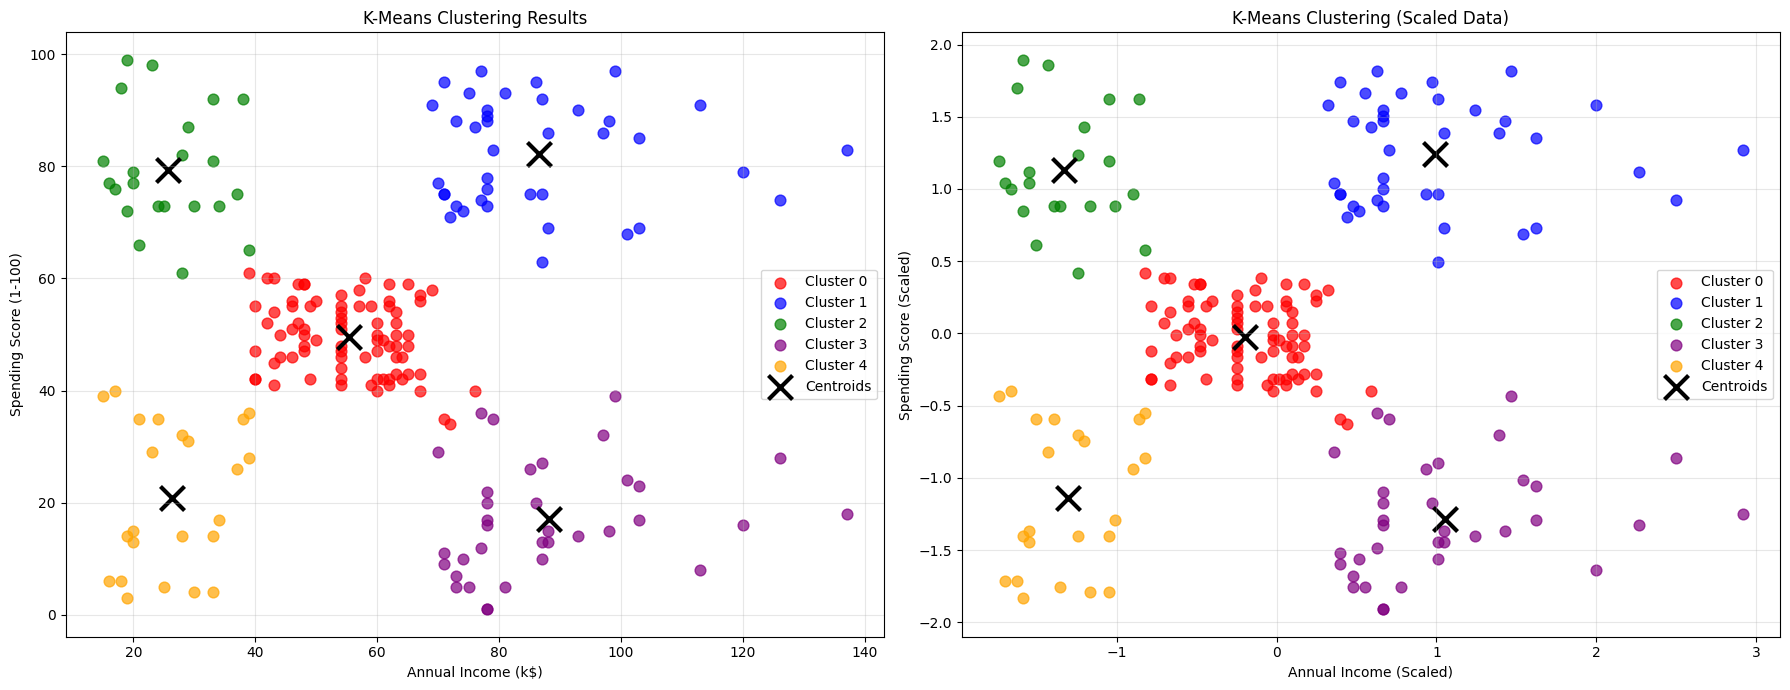

In [24]:
# Visualize clusters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink']

# Original scale
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    ax1.scatter(cluster_data['Annual Income (k$)'], 
               cluster_data['Spending Score (1-100)'], 
               c=colors[i], label=f'Cluster {i}', alpha=0.7, s=60)

# Plot centroids
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)
ax1.scatter(centroids_original[:, 0], centroids_original[:, 1], 
           c='black', marker='x', s=300, linewidths=3, label='Centroids')

ax1.set_xlabel('Annual Income (k$)')
ax1.set_ylabel('Spending Score (1-100)')
ax1.set_title('K-Means Clustering Results')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Scaled data
for i in range(optimal_k):
    cluster_mask = cluster_labels == i
    ax2.scatter(features_scaled[cluster_mask, 0], 
               features_scaled[cluster_mask, 1], 
               c=colors[i], label=f'Cluster {i}', alpha=0.7, s=60)

ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           c='black', marker='x', s=300, linewidths=3, label='Centroids')

ax2.set_xlabel('Annual Income (Scaled)')
ax2.set_ylabel('Spending Score (Scaled)')
ax2.set_title('K-Means Clustering (Scaled Data)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Cluster Analysis

In [25]:
# Analyze clusters
cluster_analysis = df.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std'],
    'Age': ['mean', 'std'],
    'CustomerID': 'count'
}).round(2)

cluster_analysis.columns = ['Income_Mean', 'Income_Std', 'Spending_Mean', 'Spending_Std',
                           'Age_Mean', 'Age_Std', 'Count']

print("SUMMARY:")
print("=" * 50)
print(cluster_analysis)

print("\nCLUSTER PROFILES:")
print("=" * 50)
for cluster in range(optimal_k):
    data = cluster_analysis.loc[cluster]
    print(f"\n Cluster {cluster}:")
    print(f"   Size: {data['Count']} customers ({data['Count']/len(df)*100:.1f}%)")
    print(f"   Avg Income: ${data['Income_Mean']:.0f}k")
    print(f"   Avg Spending: {data['Spending_Mean']:.1f}/100")
    print(f"   Avg Age: {data['Age_Mean']:.1f} years")
    
    # Classify cluster type
    if data['Income_Mean'] > 60 and data['Spending_Mean'] > 60:
        cluster_type = "High Income, High Spending (Premium Customers)"
    elif data['Income_Mean'] > 60 and data['Spending_Mean'] < 40:
        cluster_type = "High Income, Low Spending (Conservative Customers)"
    elif data['Income_Mean'] < 40 and data['Spending_Mean'] > 60:
        cluster_type = "Low Income, High Spending (Impulsive Customers)"
    elif data['Income_Mean'] < 40 and data['Spending_Mean'] < 40:
        cluster_type = "Low Income, Low Spending (Budget Customers)"
    else:
        cluster_type = "Medium Income, Medium Spending (Balanced Customers)"
    
    print(f"   Type: {cluster_type}")

SUMMARY:
         Income_Mean  Income_Std  Spending_Mean  Spending_Std  Age_Mean  \
Cluster                                                                   
0              55.30        8.99          49.52          6.53     42.72   
1              86.54       16.31          82.13          9.36     32.69   
2              25.73        7.57          79.36         10.50     25.27   
3              88.20       16.40          17.11          9.95     41.11   
4              26.30        7.89          20.91         13.02     45.22   

         Age_Std  Count  
Cluster                  
0          16.45     81  
1           3.73     39  
2           5.26     22  
3          11.34     35  
4          13.23     23  

CLUSTER PROFILES:

 Cluster 0:
   Size: 81.0 customers (40.5%)
   Avg Income: $55k
   Avg Spending: 49.5/100
   Avg Age: 42.7 years
   Type: Medium Income, Medium Spending (Balanced Customers)

 Cluster 1:
   Size: 39.0 customers (19.5%)
   Avg Income: $87k
   Avg Spending: 82.1/10

In [26]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(features_scaled)
df['DBSCAN_Cluster'] = dbscan_labels

n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"    DBSCAN Results:")
print(f"   Clusters found: {n_clusters_dbscan}")
print(f"   Noise points: {n_noise}")
print(f"   Noise percentage: {n_noise/len(df)*100:.1f}%")

print("\nDBSCAN cluster distribution:")
dbscan_counts = df['DBSCAN_Cluster'].value_counts().sort_index()
for cluster, count in dbscan_counts.items():
    cluster_name = "Noise" if cluster == -1 else f"Cluster {cluster}"
    print(f"{cluster_name}: {count} customers ({count/len(df)*100:.1f}%)")

    DBSCAN Results:
   Clusters found: 2
   Noise points: 8
   Noise percentage: 4.0%

DBSCAN cluster distribution:
Noise: 8 customers (4.0%)
Cluster 0: 157 customers (78.5%)
Cluster 1: 35 customers (17.5%)


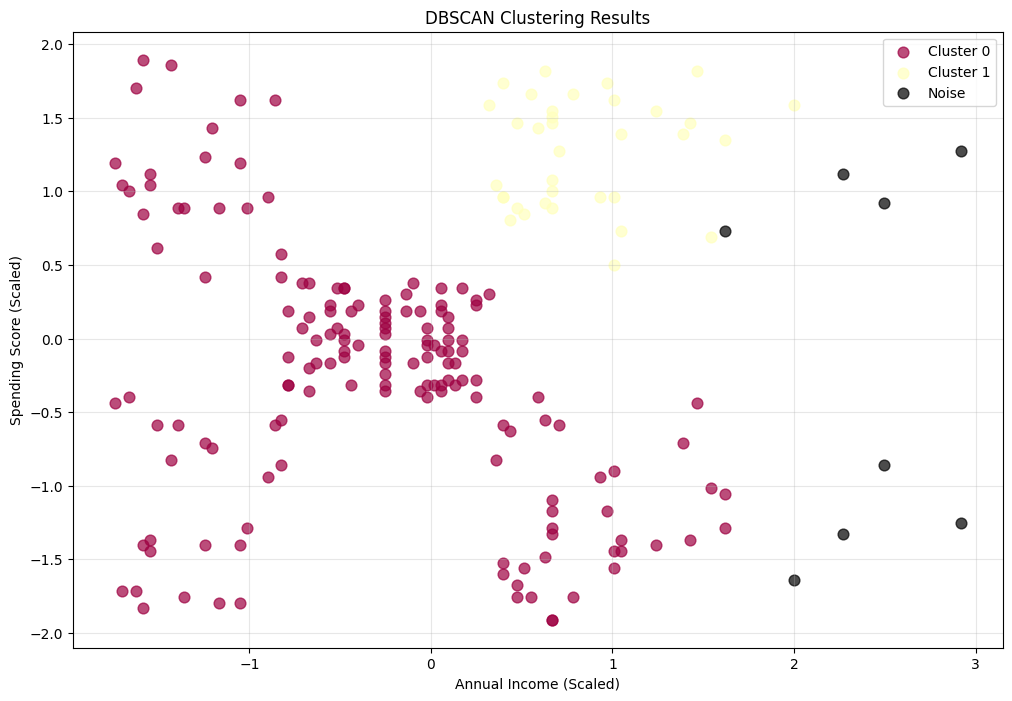

In [27]:
# Visualize DBSCAN results
plt.figure(figsize=(12, 8))

unique_labels = set(dbscan_labels)
colors_dbscan = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors_dbscan):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise
        label = 'Noise'
    else:
        label = f'Cluster {k}'
    
    class_member_mask = (dbscan_labels == k)
    xy = features_scaled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], alpha=0.7, s=60, label=label)

plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.title('DBSCAN Clustering Results')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Spending Analysis Comparison:

K-Means - Average Spending per Cluster:
          mean  count
Cluster              
0        49.52     81
1        82.13     39
2        79.36     22
3        17.11     35
4        20.91     23

DBSCAN - Average Spending per Cluster:
                 mean  count
DBSCAN_Cluster              
-1              46.88      8
 0              43.10    157
 1              82.80     35


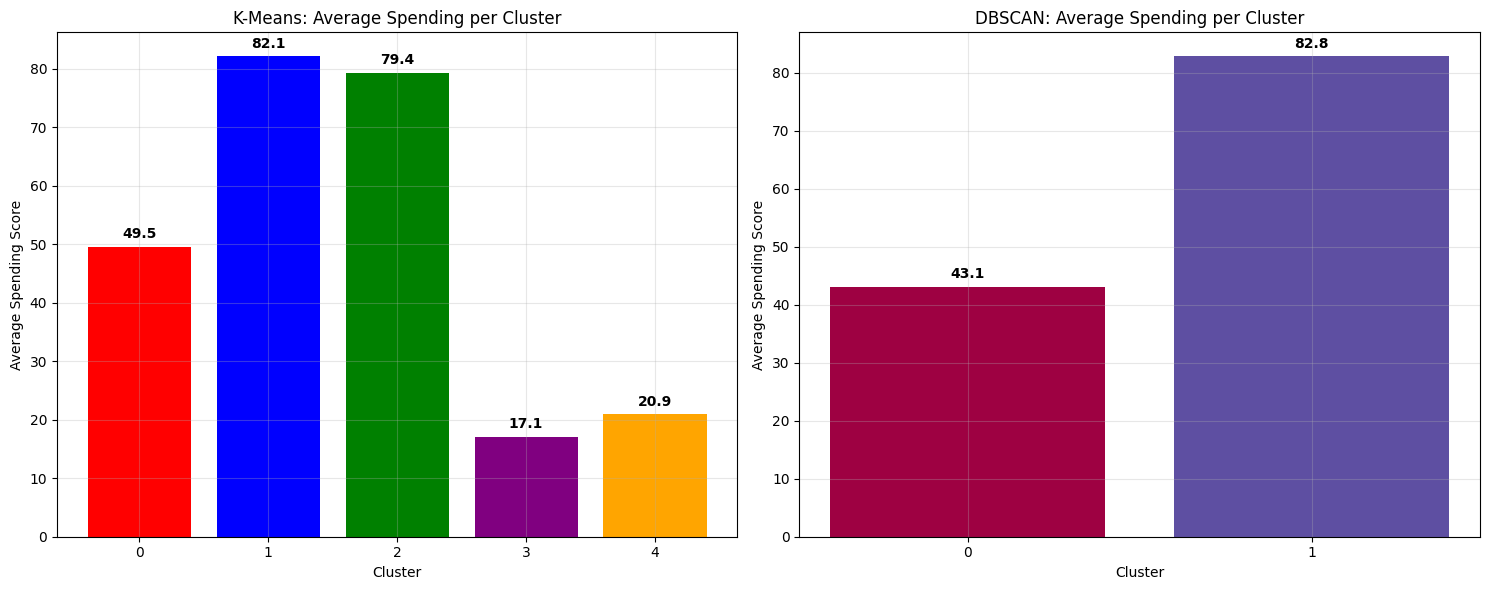

In [28]:
# Compare spending across algorithms
kmeans_spending = df.groupby('Cluster')['Spending Score (1-100)'].agg(['mean', 'count']).round(2)
dbscan_spending = df.groupby('DBSCAN_Cluster')['Spending Score (1-100)'].agg(['mean', 'count']).round(2)

print("Spending Analysis Comparison:")
print("=" * 50)
print("\nK-Means - Average Spending per Cluster:")
print(kmeans_spending)
print("\nDBSCAN - Average Spending per Cluster:")
print(dbscan_spending)

# Visualize spending comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# K-Means spending
bars1 = ax1.bar(range(len(kmeans_spending)), kmeans_spending['mean'], 
                color=colors[:len(kmeans_spending)])
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Average Spending Score')
ax1.set_title('K-Means: Average Spending per Cluster')
ax1.set_xticks(range(len(kmeans_spending)))
ax1.grid(True, alpha=0.3)

for i, v in enumerate(kmeans_spending['mean']):
    ax1.text(i, v + 1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

# DBSCAN spending (excluding noise)
dbscan_clean = dbscan_spending[dbscan_spending.index != -1] if -1 in dbscan_spending.index else dbscan_spending
if len(dbscan_clean) > 0:
    bars2 = ax2.bar(range(len(dbscan_clean)), dbscan_clean['mean'], 
                    color=plt.cm.Spectral(np.linspace(0, 1, len(dbscan_clean))))
    ax2.set_xlabel('Cluster')
    ax2.set_ylabel('Average Spending Score')
    ax2.set_title('DBSCAN: Average Spending per Cluster')
    ax2.set_xticks(range(len(dbscan_clean)))
    ax2.grid(True, alpha=0.3)
    
    for i, v in enumerate(dbscan_clean['mean']):
        ax2.text(i, v + 1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()